# TF Regression
Lets try doing some real-life scenario

In [1]:
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import matplotlib.pyplot as plt


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
#huge data
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.randn(len(x_data))

y = mx + b

b = 5

In [3]:
y_true = (0.5 * x_data) + 5 + noise

In [4]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [5]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [6]:
y_df.head()

,Y
0,4.748329
1,5.831925
2,4.891168
3,4.159879
4,4.614197


In [7]:
my_data = pd.concat([x_df,y_df],axis=1)
my_data.head()

,X Data,Y
0,0.00000,4.748329
1,0.00001,5.831925
2,0.00002,4.891168
3,0.00003,4.159879
4,0.00004,4.614197


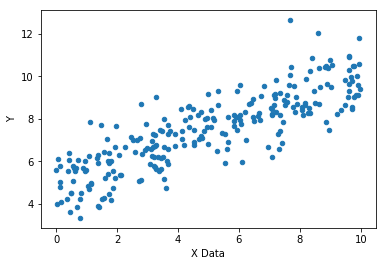

In [8]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

## Time to Start Training

In [66]:
# when we normally do our training, we only train a sample of our data
# this is how we scale our training (example: sagemaker) using multiple 
# instances
# WARNING: whenever you get a "NaN" model, it means you have exceeded your batch capacity
batch_size = 30

In [50]:
# declare our variables (trainable part) with random initial data
m = tf.Variable(0.89)
b = tf.Variable(0.11)

In [51]:
# placeholders for actual data
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [52]:
# the graph of our actual model
y_model = m*xph + b

In [53]:
# our cost function = calculates the correctness of the current model
error = tf.reduce_sum(tf.square(yph-y_model))

In [54]:
# our optimizer is tasked with adjusting our variables until we get it right
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [55]:
# our initialization operation: to asign the initial data to our variables
# call this during the start of the training
init = tf.global_variables_initializer()

In [69]:
# the actual training
with tf.Session() as sess:
    sess.run(init)
    batches = 30
    
    for i in range(batches):
        # picks a bunch (batch_size) of random indexes
        rand_indices = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_indices],yph:y_true[rand_indices]}
        
        sess.run(train,feed_dict=feed)
        model_m,model_b = sess.run([m,b])

In [70]:
# if you are getting a "NaN", check if you exceeded your batch size
model_m

0.7315221

In [71]:
# if you are getting a "NaN", check if you exceeded your batch size
model_b

2.0085092

In [72]:
y_hat = x_data*model_m + model_b

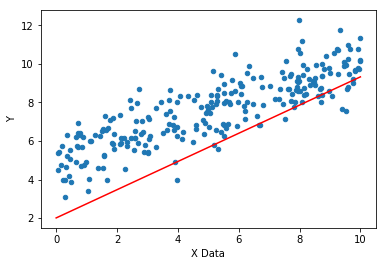

In [73]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')